In [ ]:
#import packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import LabelEncoder for converting categorical variables into numerical (dummy) variables
from sklearn import preprocessing as prep

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
#import and view data:
heart = pd.read_csv('heart.csv')

# Data Stats

In [ ]:
#view data dimensions:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
#identidy data dimensions: (rows, columns)
print("Dimensions of Heart Data: {}".format(heart.shape))

Dimensions of Heart Data: (918, 12)


In [ ]:
#identify data types:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
#convert catergorical variables to numerical:
le = prep.LabelEncoder()

heart['Sex']=le.fit_transform(heart['Sex'])
heart['ChestPainType']=le.fit_transform(heart['ChestPainType'])
heart['RestingECG']=le.fit_transform(heart['RestingECG'])
heart['ExerciseAngina']=le.fit_transform(heart['ExerciseAngina'])
heart['ST_Slope']=le.fit_transform(heart['ST_Slope'])

# Data Visuals

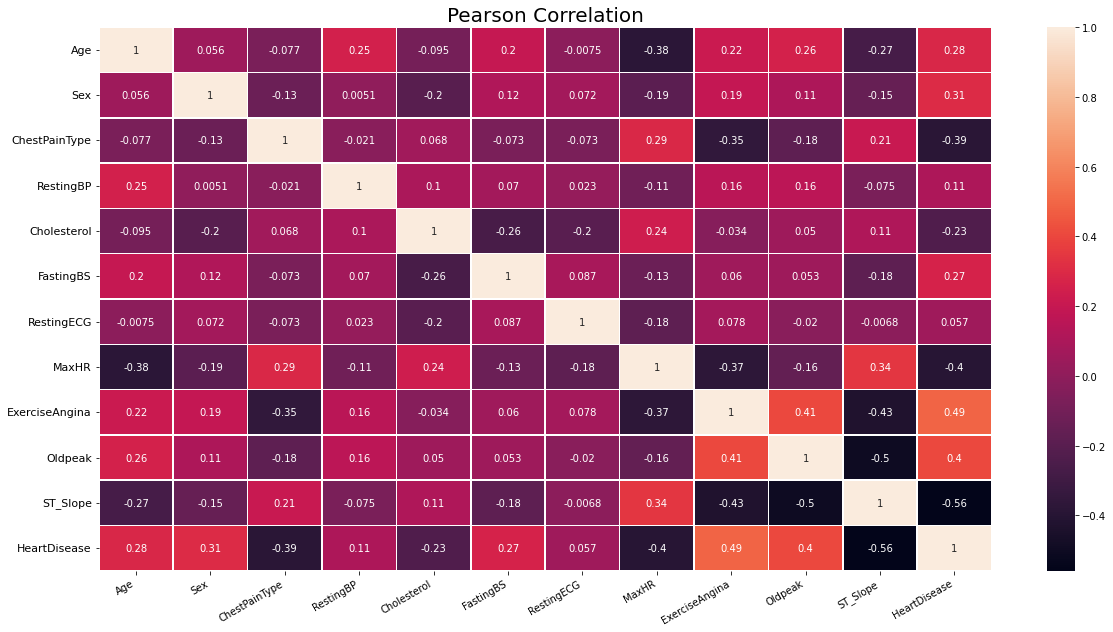

In [ ]:
#correlation plot1:
corrmat = heart.corr()
#print(corrmat)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
sns.heatmap(corrmat, vmax=1, annot=True, linewidths=.5)
plt.xticks(rotation=30, horizontalalignment='right')
plt.yticks(size=11)
plt.title('Pearson Correlation', size=20)
plt.show()

#interpretation:
#Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1.
#Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are;
#that is as one increases so does the other and the closer to 1 the stronger this relationship is.
#A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.

# MODEL 1: K-Nearest Neighbor (KNN)

Code from website

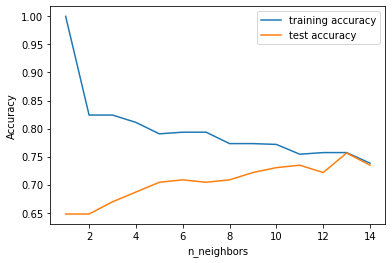

In [ ]:
#prepare data for KNN model:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(heart.loc[:, heart.columns != 'HeartDisease'], heart['HeartDisease'], random_state=66)
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []

#try n_neighbors from 1 to 10
neighbors_settings = range(1, 15)
for n_neighbors in neighbors_settings:

      #build the model
      knn = KNeighborsClassifier(n_neighbors=n_neighbors)
      knn.fit(X_train, y_train)

      # record training set accuracy
      training_accuracy.append(knn.score(X_train, y_train))

      # record test set accuracy
      test_accuracy.append(knn.score(X_test, y_test))

#plot accuracy calculations for both sets:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [ ]:
#check accuracy score for KNN model:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.76
Accuracy of K-NN classifier on test set: 0.76


In [ ]:
#predictions using test data:

preds = knn.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, preds))

# Model Precision
print("Precision:",metrics.precision_score(y_test,preds))

# Model Recall
print("Recall:",metrics.recall_score(y_test, preds))

# Confusion matrix
print("Confusion matrix:\n", metrics.confusion_matrix(y_test, preds))

Accuracy: 0.7565217391304347
Precision: 0.7769230769230769
Recall: 0.7890625
Confusion matrix:
 [[ 73  29]
 [ 27 101]]


Text(0, 0.5, 'Percent Measure')

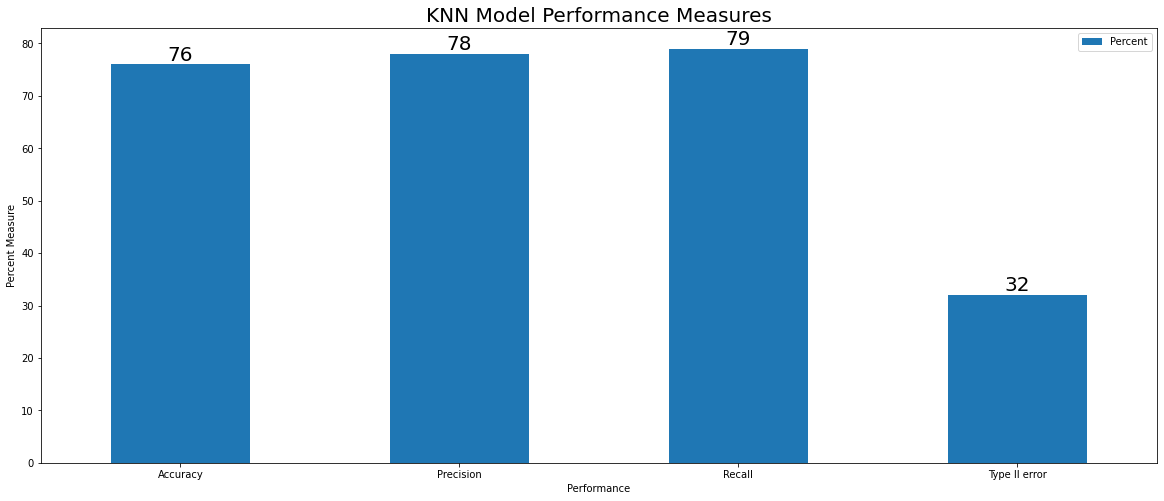

In [ ]:
#performance measure visual:
knndf = pd.DataFrame({'Performance':['Accuracy', 'Precision', 'Recall', 'Type II error'], 'Percent':[76, 78, 79, 32]})
pt_knndf = knndf.plot.bar(x='Performance', y='Percent', rot=0, figsize=(20,8))

for bar in pt_knndf.patches:
  bar_value = bar.get_height()
  text = f'{bar_value:,}'
  text_x = bar.get_x() + bar.get_width() / 2
  text_y = bar.get_y() + bar_value
  pt_knndf.text(text_x, text_y, text, ha='center', va='bottom',
          size=20)

plt.title('KNN Model Performance Measures', size=20)
plt.ylabel('Percent Measure')

# MODEL 2: Decision Tree Classifier

Code from Colab Sheet #3

In [ ]:
#Variables to train
X_labels =  ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
         'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

X=heart[X_labels]

#Variables to predict
y=heart['HeartDisease']

In [ ]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Create Decison Tree  Classifier
dt = DecisionTreeClassifier()

#Train the DT model
dt.fit(X_train, y_train)

#Predict the outcome for Test data
preds1 = dt.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, preds1))

# Model Precision
print("Precision:",metrics.precision_score(y_test, preds1))

# Model Recall
print("Recall:",metrics.recall_score(y_test, preds1))

# Confusion matrix
print("Confusion matrix:\n", metrics.confusion_matrix(y_test, preds1))

Accuracy: 0.7463768115942029
Precision: 0.8357142857142857
Recall: 0.7134146341463414
Confusion matrix:
 [[ 89  23]
 [ 47 117]]


Code from Website (with prunning)

In [ ]:
#Variables to train
X_labels =  ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
         'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

X=heart[X_labels]

#Variables to predict
y=heart['HeartDisease']

In [ ]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [ ]:
#model without prunning
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.758


In [ ]:
#apply prunning to scale model performance for train and test data
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.879
Accuracy on test set: 0.835


In [ ]:
#Predict the outcome for Test data
preds2 = tree.predict(X_test)

In [ ]:
#performance measures for prunned tree:
print("Accuracy:",metrics.accuracy_score(y_test, preds2))

# Model Precision
print("Precision:",metrics.precision_score(y_test, preds2))

# Model Recall
print("Recall:",metrics.recall_score(y_test, preds2))

# Confusion matrix
print("Confusion matrix:\n", metrics.confusion_matrix(y_test, preds2))

Accuracy: 0.8354037267080745
Precision: 0.9058823529411765
Recall: 0.806282722513089
Confusion matrix:
 [[115  16]
 [ 37 154]]


Text(0, 0.5, 'Percent Measure')

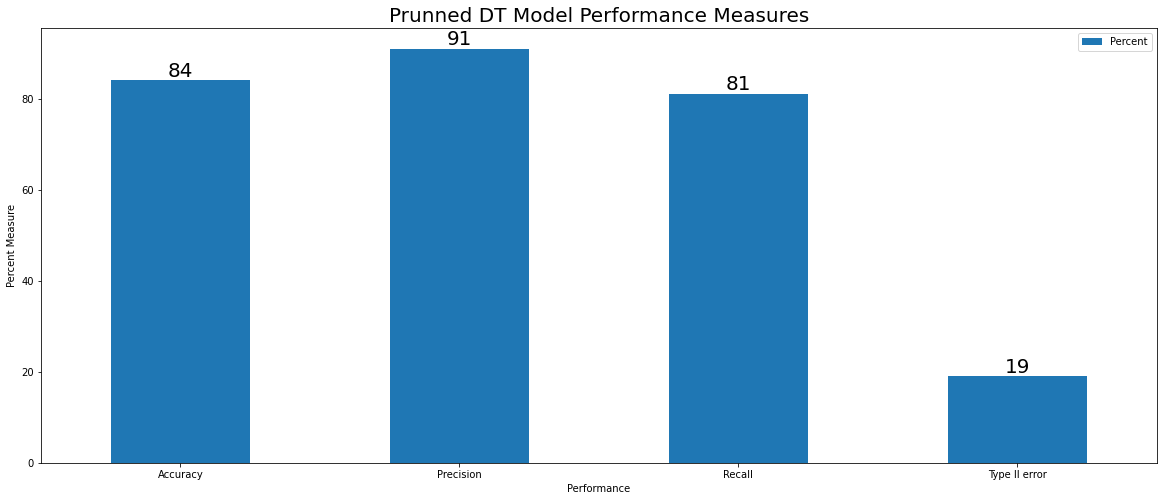

In [ ]:
#performance measure visual for prunned DT model:
DTdf = pd.DataFrame({'Performance':['Accuracy', 'Precision', 'Recall', 'Type II error'], 'Percent':[84, 91, 81, 19]})
pt_DTdf = DTdf.plot.bar(x='Performance', y='Percent', rot=0, figsize=(20,8))

for bar in pt_DTdf.patches:
  bar_value = bar.get_height()
  text = f'{bar_value:,}'
  text_x = bar.get_x() + bar.get_width() / 2
  text_y = bar.get_y() + bar_value
  pt_DTdf.text(text_x, text_y, text, ha='center', va='bottom',
          size=20)


plt.title('Prunned DT Model Performance Measures', size=20)
plt.ylabel('Percent Measure')

In [ ]:
#identify feature importance for decision tree:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.00853544 0.03716485 0.10355739 0.00856891 0.00408991 0.01732759
 0.         0.06661485 0.03467458 0.11626842 0.60319806]


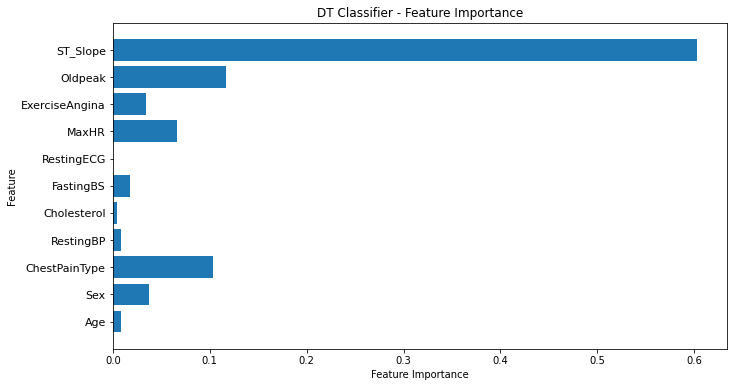

In [ ]:
#visualize feature importance for decision tree:
def plot_feature_importances_heart(model):
    plt.figure(figsize=(11,6))
    n_features = 11
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.title('DT Classifier - Feature Importance')
    plt.yticks(np.arange(n_features), heart, size=11)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_heart(tree)

# Logistic Regression Model

Code from Colab Sheet #2

In [ ]:
#import prep items
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
#Variables to predict
X=heart[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
         'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]

X_labels = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
         'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

#Variables to predict
y=heart['HeartDisease']

In [ ]:
#split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Create Logistic Regression Classifier
lr = LogisticRegression()

#Train the LR model
lr.fit(X_train, y_train)

#Predict the outcome for Test data
preds3 = lr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#check accuracy score for log reg model:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Accuracy of lr classifier on training set: {:.2f}'.format(lr.score(X_train, y_train)))
print('Accuracy of lr classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))

Accuracy of lr classifier on training set: 0.85
Accuracy of lr classifier on test set: 0.87


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, preds3))

# Model Precision
print("Precision:",metrics.precision_score(y_test, preds3))

# Model Recall
print("Recall:",metrics.recall_score(y_test, preds3))

# Confusion matrix
print("Confusion matrix:\n", metrics.confusion_matrix(y_test, preds3))

Accuracy: 0.8695652173913043
Precision: 0.9210526315789473
Recall: 0.8536585365853658
Confusion matrix:
 [[100  12]
 [ 24 140]]


Text(0, 0.5, 'Percent Measure')

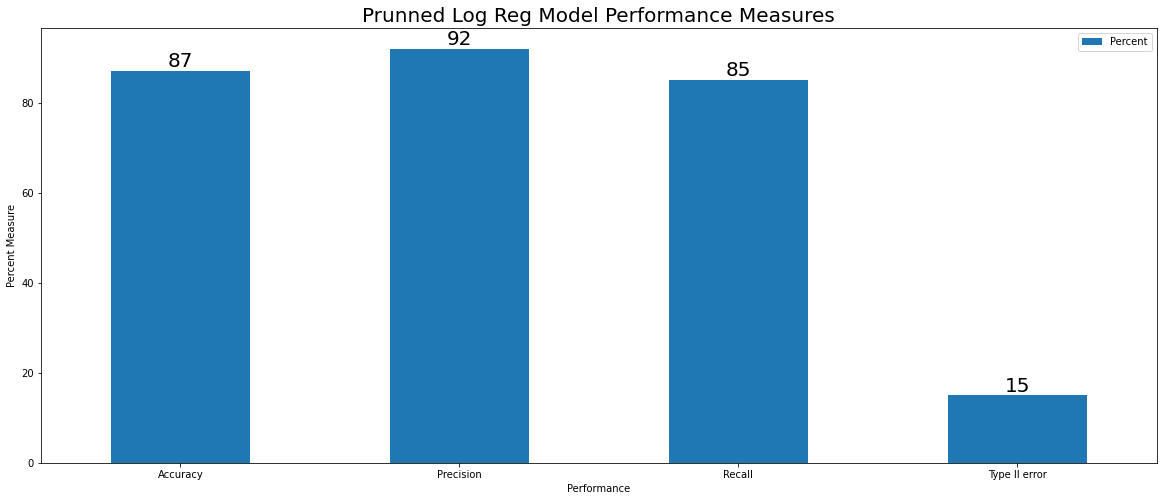

In [ ]:
#performance measure visual for LOG Reg model:
LRdf = pd.DataFrame({'Performance':['Accuracy', 'Precision', 'Recall', 'Type II error'], 'Percent':[87, 92, 85, 15]})
pt_LRdf = LRdf.plot.bar(x='Performance', y='Percent', rot=0, figsize=(20,8))

for bar in pt_LRdf.patches:
  bar_value = bar.get_height()
  text = f'{bar_value:,}'
  text_x = bar.get_x() + bar.get_width() / 2
  text_y = bar.get_y() + bar_value
  pt_LRdf.text(text_x, text_y, text, ha='center', va='bottom',
          size=20)

plt.title('Prunned Log Reg Model Performance Measures', size=20)
plt.ylabel('Percent Measure')

# Deep Learning Model

Code from website

In [ ]:
#import prep items
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.77
Accuracy on test set: 0.79


In [ ]:
#rescaling data for better accuracy:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
mlp = MLPClassifier(random_state=0, hidden_layer_sizes=83)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.905
Accuracy on test set: 0.909


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
#Variables to predict
X=heart[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
         'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]

X_labels = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
         'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

#Variables to predict
y=heart['HeartDisease']

In [ ]:
#split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Train classifier:
model = mlp.fit(X_train_scaled, y_train)

# Make predictions:
preds4 = mlp.predict(X_test_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, preds4))

# Model Precision
print("Precision:",metrics.precision_score(y_test, preds4))

# Model Recall
print("Recall:",metrics.recall_score(y_test, preds4))

# Confusion matrix
print("Confusion matrix:\n", metrics.confusion_matrix(y_test, preds4))

Accuracy: 0.9094202898550725
Precision: 0.9371069182389937
Recall: 0.9085365853658537
Confusion matrix:
 [[102  10]
 [ 15 149]]


Text(0, 0.5, 'Percent Measure')

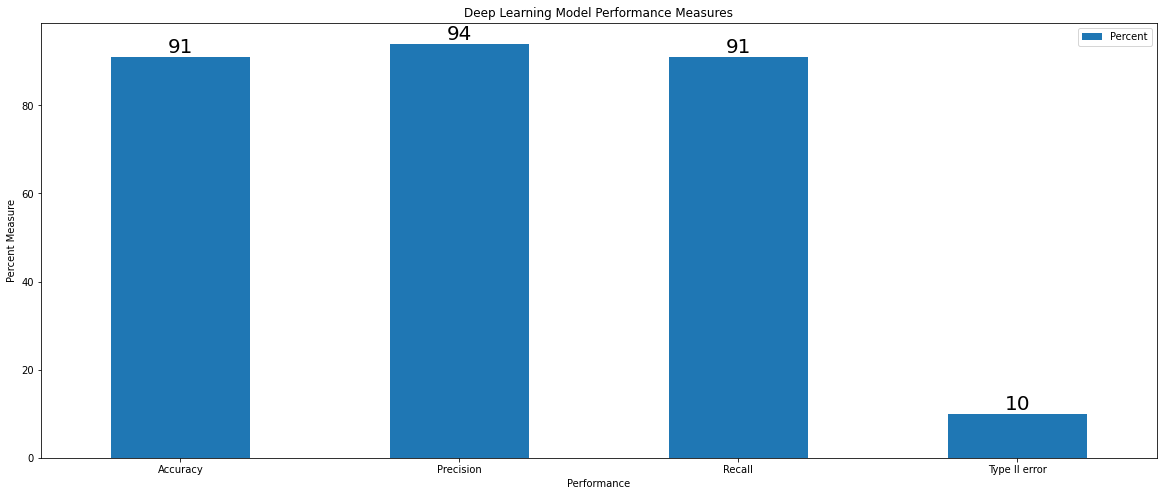

In [ ]:
#performance measure visual for Deep Learning model:
DLdf = pd.DataFrame({'Performance':['Accuracy', 'Precision', 'Recall', 'Type II error'], 'Percent':[91, 94, 91, 10]})
pt_DLdf = DLdf.plot.bar(x='Performance', y='Percent', rot=0, figsize=(20,8))

for bar in pt_DLdf.patches:
  bar_value = bar.get_height()
  text = f'{bar_value:,}'
  text_x = bar.get_x() + bar.get_width() / 2
  text_y = bar.get_y() + bar_value
  pt_DLdf.text(text_x, text_y, text, ha='center', va='bottom',
          size=20)

plt.title('Deep Learning Model Performance Measures')
plt.ylabel('Percent Measure')

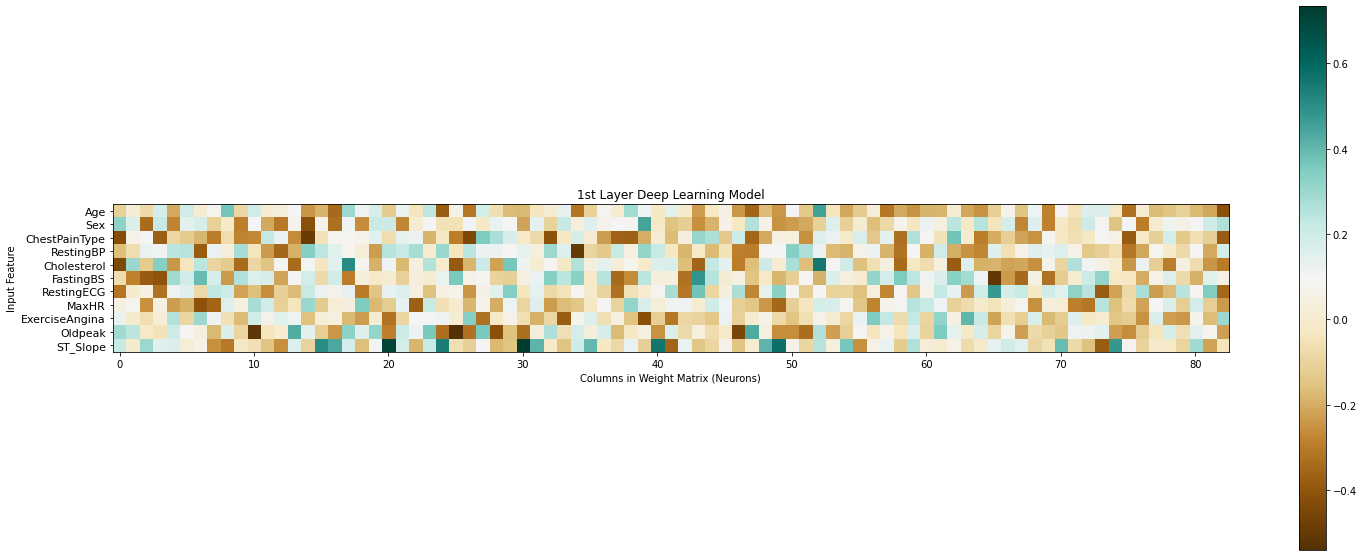

In [ ]:
#correlation plot2:
plt.figure(figsize=(25, 10))
plt.imshow(mlp.coefs_[0], interpolation='nearest', cmap='BrBG')
plt.yticks(range(11), heart, size=11)
plt.xlabel("Columns in Weight Matrix (Neurons)")
plt.ylabel("Input Feature")
plt.title('1st Layer Deep Learning Model')
plt.colorbar()

#interpretation:
#Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1.
#Values closer to zero means there is no linear trend between the two variables. The closer to 1 the correlation is the more positively correlated they are;
#that is as one increases so does the other and the closer to 1 the stronger this relationship is.
#A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.

# Visual of Performance for All Models

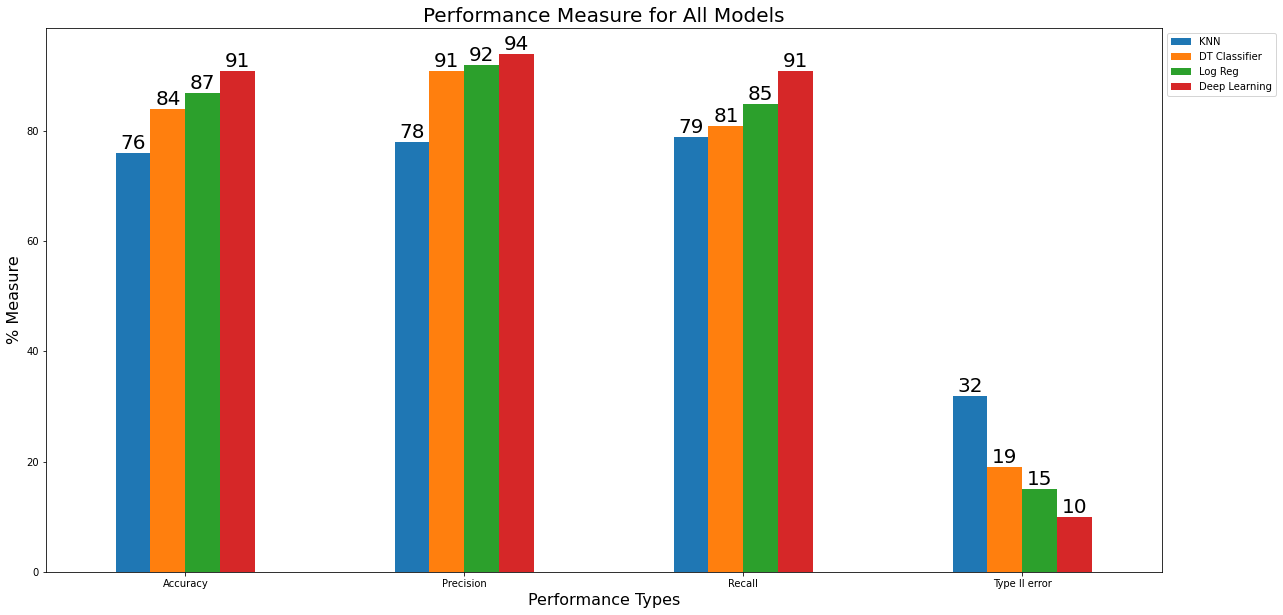

In [ ]:
#plot all performance measures for all models:
import matplotlib.pyplot as plt

df = pd.concat([knndf.set_index('Performance'), DTdf.set_index('Performance'), LRdf.set_index('Performance'), DLdf.set_index('Performance')], axis=1)

pt_DL = df.plot.bar(figsize=(20, 10), fontsize = 10)

for bar in pt_DL.patches:
  bar_value = bar.get_height()
  text = f'{bar_value:,}'
  text_x = bar.get_x() + bar.get_width() / 2
  text_y = bar.get_y() + bar_value
  pt_DL.text(text_x, text_y, text, ha='center', va='bottom',
          size=20)

plt.gca().legend(('KNN', 'DT Classifier', 'Log Reg', 'Deep Learning'), bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Performance Measure for All Models', fontsize = 20)
plt.xlabel('Performance Types', fontsize = 16)
plt.ylabel('% Measure', fontsize = 16)
plt.xticks(rotation=0)
plt.show()